In [3]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import the dataset
data= pd.read_csv("D:/nyan/Task 1 YouTube Streamer Analysis/youtubers_df.csv")
print(data)
#Structure of the data
str(data)
#description of the data
data.describe()
print(data.columns)
print(data)

     Rank              Username           Categories  Suscribers  \
0       1               tseries       Música y baile   249500000   
1       2               MrBeast   Videojuegos, Humor   183500000   
2       3             CoComelon            Educación   165500000   
3       4              SETIndia                  NaN   162600000   
4       5         KidsDianaShow  Animación, Juguetes   113500000   
..    ...                   ...                  ...         ...   
995   996          hamzymukbang                  NaN    11700000   
996   997            Adaahqueen                  NaN    11700000   
997   998  LittleAngelIndonesia       Música y baile    11700000   
998   999          PenMultiplex                  NaN    11700000   
999  1000         OneindiaHindi  Noticias y Política    11700000   

            Country       Visits    Likes  Comments  \
0             India      86200.0     2700        78   
1    Estados Unidos  117400000.0  5300000     18500   
2           Unknow

In [ ]:
1.DATA_EXPLORATION

In [5]:
#Data Cleaning
#Cleaning the data atrributes such as Rank and link
print(data.columns.tolist())
data.drop(['Rank', 'Links'], axis=1, inplace=True)
print(data)

['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits', 'Likes', 'Comments', 'Links']
                 Username           Categories  Suscribers         Country  \
0                 tseries       Música y baile   249500000           India   
1                 MrBeast   Videojuegos, Humor   183500000  Estados Unidos   
2               CoComelon            Educación   165500000         Unknown   
3                SETIndia                  NaN   162600000           India   
4           KidsDianaShow  Animación, Juguetes   113500000         Unknown   
..                    ...                  ...         ...             ...   
995          hamzymukbang                  NaN    11700000  Estados Unidos   
996            Adaahqueen                  NaN    11700000           India   
997  LittleAngelIndonesia       Música y baile    11700000         Unknown   
998          PenMultiplex                  NaN    11700000           India   
999         OneindiaHindi  Noticias y Polí

In [6]:
#rename the 3rd column suscribers to subscribers
data.rename(columns= {'Suscribers':'Subscribers'}, inplace=True)
print(data)

                 Username           Categories  Subscribers         Country  \
0                 tseries       Música y baile    249500000           India   
1                 MrBeast   Videojuegos, Humor    183500000  Estados Unidos   
2               CoComelon            Educación    165500000         Unknown   
3                SETIndia                  NaN    162600000           India   
4           KidsDianaShow  Animación, Juguetes    113500000         Unknown   
..                    ...                  ...          ...             ...   
995          hamzymukbang                  NaN     11700000  Estados Unidos   
996            Adaahqueen                  NaN     11700000           India   
997  LittleAngelIndonesia       Música y baile     11700000         Unknown   
998          PenMultiplex                  NaN     11700000           India   
999         OneindiaHindi  Noticias y Política     11700000           India   

          Visits    Likes  Comments  
0        8620

In [7]:
#identify there is any dupication and remove those duplication
data[data['Username'].duplicated()]


,Username,Categories,Subscribers,Country,Visits,Likes,Comments
250,NickyJamTV,"Música y baile, Películas",23700000,Colombia,15800.0,1200,58
450,thexoteam,NaN,17900000,Estados Unidos,772800.0,45000,185
451,mgcplayhouse,"Juguetes, Coches y vehículos",17800000,Unknown,63600.0,75,0
952,Super_Senya_RU,"Animación, Juguetes",12100000,Unknown,47200.0,192,0
953,HiTechIslamic,Música y baile,12100000,Pakistán,62200.0,810,59
956,Family-Box,Películas,12000000,Rusia,177400.0,6300,86


In [8]:
data['Username'].duplicated().sum()

6

In [9]:
data.drop_duplicates(subset=['Username'], inplace=True)
print(data)

                 Username           Categories  Subscribers         Country  \
0                 tseries       Música y baile    249500000           India   
1                 MrBeast   Videojuegos, Humor    183500000  Estados Unidos   
2               CoComelon            Educación    165500000         Unknown   
3                SETIndia                  NaN    162600000           India   
4           KidsDianaShow  Animación, Juguetes    113500000         Unknown   
..                    ...                  ...          ...             ...   
995          hamzymukbang                  NaN     11700000  Estados Unidos   
996            Adaahqueen                  NaN     11700000           India   
997  LittleAngelIndonesia       Música y baile     11700000         Unknown   
998          PenMultiplex                  NaN     11700000           India   
999         OneindiaHindi  Noticias y Política     11700000           India   

          Visits    Likes  Comments  
0        8620

In [10]:
#Adding the column that contains the continent of each country
continent_dict = {
    'India': 'Asia',
    'Estados Unidos': 'North America',
    'Brasil': 'South America',
    'México': 'North America',
    'Rusia': 'Europe/Asia', 
    'Pakistán': 'Asia',
    'Indonesia': 'Asia',
    'Francia': 'Europe',
    'Colombia': 'South America',
    'Iraq': 'Asia',
    'Filipinas': 'Asia',
    'Argentina': 'South America',
    'Turquía': 'Europe/Asia',  
    'Tailandia': 'Asia',
    'Arabia Saudita': 'Asia',
    'Bangladesh': 'Asia',
    'Reino Unido': 'Europe',
    'Perú': 'South America',
    'España': 'Europe',
    'Egipto': 'Africa',
    'Jordania': 'Asia',
    'Marruecos': 'Africa',
    'Singapur': 'Asia',
    'Argelia': 'Africa',
    'Japón': 'Asia',
    'Somalia': 'Africa'
}
data['Continent'] = data['Country'].map(continent_dict)
print(data)

                 Username           Categories  Subscribers         Country  \
0                 tseries       Música y baile    249500000           India   
1                 MrBeast   Videojuegos, Humor    183500000  Estados Unidos   
2               CoComelon            Educación    165500000         Unknown   
3                SETIndia                  NaN    162600000           India   
4           KidsDianaShow  Animación, Juguetes    113500000         Unknown   
..                    ...                  ...          ...             ...   
995          hamzymukbang                  NaN     11700000  Estados Unidos   
996            Adaahqueen                  NaN     11700000           India   
997  LittleAngelIndonesia       Música y baile     11700000         Unknown   
998          PenMultiplex                  NaN     11700000           India   
999         OneindiaHindi  Noticias y Política     11700000           India   

          Visits    Likes  Comments      Continent 

In [11]:
#translating categories into English
Categories_translation = {
     'Música y baile': 'Music and Dance',
    'Videojuegos, Humor': 'Video Games, Humor',
    'Películas, Videojuegos': 'Movies, Video Games',
    'Videojuegos': 'Video Games',
    'Películas, Animación': 'Movies, Animation',
    'Películas': 'Movies',
    'Noticias y Política': 'News and Politics',
    'Animación, Humor': 'Animation, Humor',
    'Música y baile, Animación': 'Music and Dance, Animation',
    'Música y baile, Películas': 'Music and Dance, Movies',
    'Películas, Humor': 'Movies, Humor',
    'Vlogs diarios': 'Daily Vlogs',
    'Animación, Videojuegos': 'Animation, Video Games',
    'Animación': 'Animation',
    'Música y baile, Humor': 'Music and Dance, Humor',
    'Diseño/arte, DIY y Life Hacks': 'Design/Art, DIY and Life Hacks',
    'Ciencia y tecnología': 'Science and Technology',
    'Fitness, Salud y autoayuda': 'Fitness, Health and Self-Help',
    'Belleza, Moda': 'Beauty, Fashion',
    'Videojuegos, Juguetes': 'Video Games, Toys',
    'Humor': 'Humor',
    'Educación': 'Education',
    'Comida y bebida': 'Food and Drink',
    'Deportes': 'Sports',
    'Fitness': 'Fitness',
    'Viajes, Espectáculos': 'Travel, Shows',
    'Comida y bebida, Salud y autoayuda': 'Food and Drink, Health and Self-Help',
    'Diseño/arte': 'Design/Art',
    'DIY y Life Hacks, Juguetes': 'DIY and Life Hacks, Toys',
    'Animação, Juguetes': 'Animation, Toys',
    'Juguetes': 'Toys',
    'Animales y mascotas': 'Animals and Pets',
    'ASMR': 'ASMR',
    'Moda': 'Fashion',
    'DIY y Life Hacks': 'DIY and Life Hacks',
    'Diseño/arte, Belleza': 'Design/Art, Beauty',
    'Coches y vehículos': 'Cars and Vehicles',
    'Animación, Humor, Juguetes': 'Animation, Humor, Toys',
    'ASMR, Comida y bebida': 'ASMR, Food and Drink',
    'Juguetes, DIY y Life Hacks': 'Toys, DIY and Life Hacks'
}
data['Categories'] = data['Categories'].replace(Categories_translation)
print(data)

                 Username           Categories  Subscribers         Country  \
0                 tseries      Music and Dance    249500000           India   
1                 MrBeast   Video Games, Humor    183500000  Estados Unidos   
2               CoComelon            Education    165500000         Unknown   
3                SETIndia                  NaN    162600000           India   
4           KidsDianaShow  Animación, Juguetes    113500000         Unknown   
..                    ...                  ...          ...             ...   
995          hamzymukbang                  NaN     11700000  Estados Unidos   
996            Adaahqueen                  NaN     11700000           India   
997  LittleAngelIndonesia      Music and Dance     11700000         Unknown   
998          PenMultiplex                  NaN     11700000           India   
999         OneindiaHindi    News and Politics     11700000           India   

          Visits    Likes  Comments      Continent 

In [12]:
#Handling Null Values
data.isnull().sum()

Username         0
Categories     305
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Continent      171
dtype: int64

In [13]:
#Displays the nan rows in the dataset
data[data.isna().any(axis=1)]

,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Continent
2,CoComelon,Education,165500000,Unknown,7000000.0,24700,0,NaN
3,SETIndia,NaN,162600000,India,15600.0,166,9,Asia
4,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,NaN
6,LikeNastyaofficial,Toys,107500000,Unknown,2600000.0,28000,0,NaN
7,VladandNiki,"Animación, Juguetes",101400000,Unknown,4100000.0,22100,0,NaN
...,...,...,...,...,...,...,...,...
994,VYRLOriginals,NaN,11700000,India,48800.0,949,101,Asia
995,hamzymukbang,NaN,11700000,Estados Unidos,397400.0,14000,124,North America
996,Adaahqueen,NaN,11700000,India,1100000.0,92500,164,Asia
997,LittleAngelIndonesia,Music and Dance,11700000,Unknown,211400.0,745,0,NaN


In [14]:
#Replace the nullvalues
data = data.fillna('Unknwon')
print(data)

                 Username           Categories  Subscribers         Country  \
0                 tseries      Music and Dance    249500000           India   
1                 MrBeast   Video Games, Humor    183500000  Estados Unidos   
2               CoComelon            Education    165500000         Unknown   
3                SETIndia              Unknwon    162600000           India   
4           KidsDianaShow  Animación, Juguetes    113500000         Unknown   
..                    ...                  ...          ...             ...   
995          hamzymukbang              Unknwon     11700000  Estados Unidos   
996            Adaahqueen              Unknwon     11700000           India   
997  LittleAngelIndonesia      Music and Dance     11700000         Unknown   
998          PenMultiplex              Unknwon     11700000           India   
999         OneindiaHindi    News and Politics     11700000           India   

          Visits    Likes  Comments      Continent 

C:\Users\Tamilselvi.R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


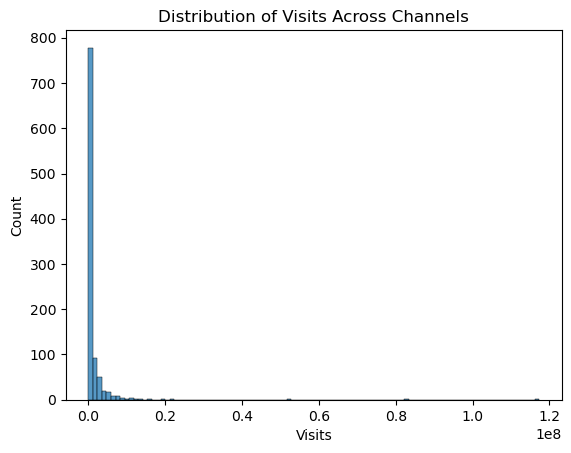

In [15]:
#Distribution attributes
#Numerical variables
sns.histplot(data['Visits'], bins=100)
plt.title('Distribution of Visits Across Channels')
plt.xlabel('Visits')
plt.show()


C:\Users\Tamilselvi.R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


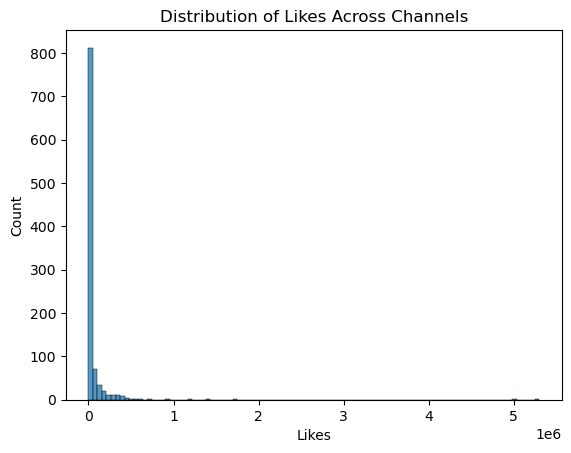

In [16]:
#Distribution of Likes Across Channels
sns.histplot(data['Likes'], bins=100)
plt.title('Distribution of Likes Across Channels')
plt.xlabel('Likes')
plt.show()

C:\Users\Tamilselvi.R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


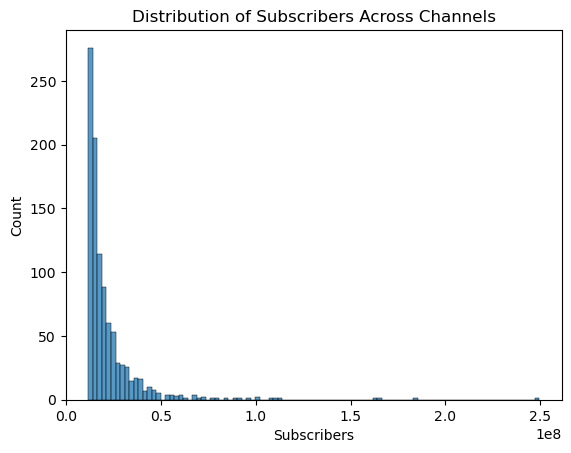

In [19]:
#Distribution of Subscribers Across Chanels
sns.histplot(data['Subscribers'], bins=100)
plt.title('Distribution of Subscribers Across Channels')
plt.xlabel('Subscribers')
plt.show()

C:\Users\Tamilselvi.R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


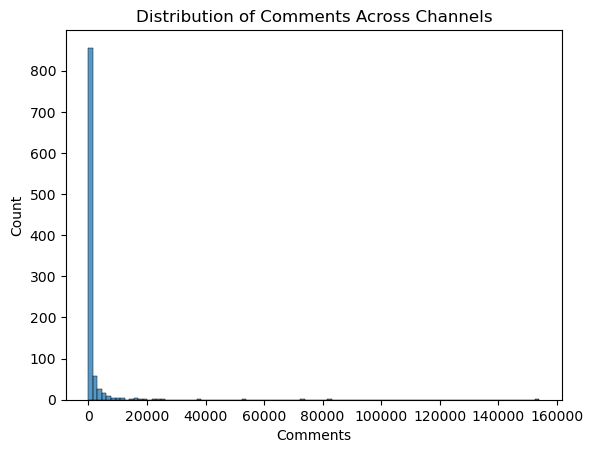

In [20]:
#Distribution of Comments Across Channels
sns.histplot(data['Comments'], bins=100)
plt.title('Distribution of Comments Across Channels')
plt.xlabel('Comments')
plt.show()

<Axes: >

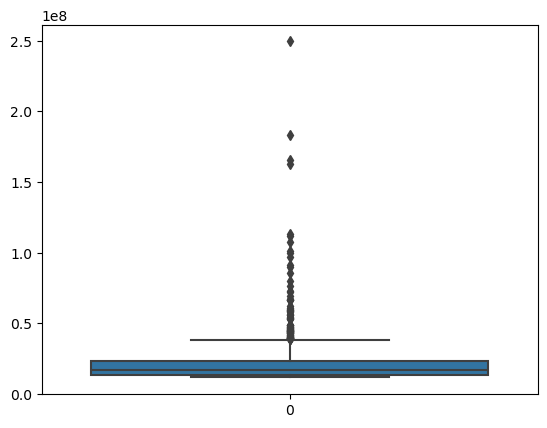

In [21]:
#Distribution of Subscribers by Boxplot
sns.boxplot(data['Subscribers'])


<Axes: >

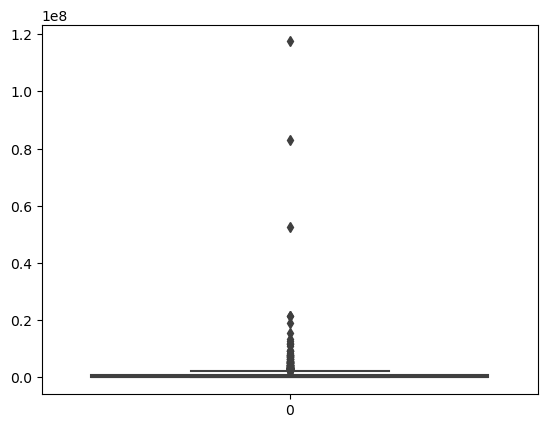

In [22]:
#Distribution of Visits by Boxplot
sns.boxplot(data['Visits'])


<Axes: >

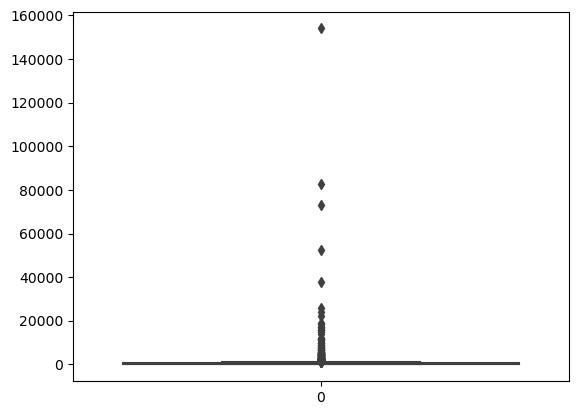

In [23]:
#Distribution of Comments by Boxplot
sns.boxplot(data['Comments'])


<Axes: >

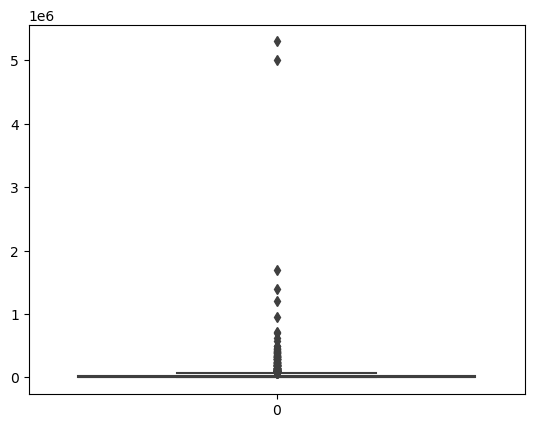

In [24]:
#Distribution of Likes by Boxplot
sns.boxplot(data['Likes'])

In [ ]:
2.TREND_ANALYSIS

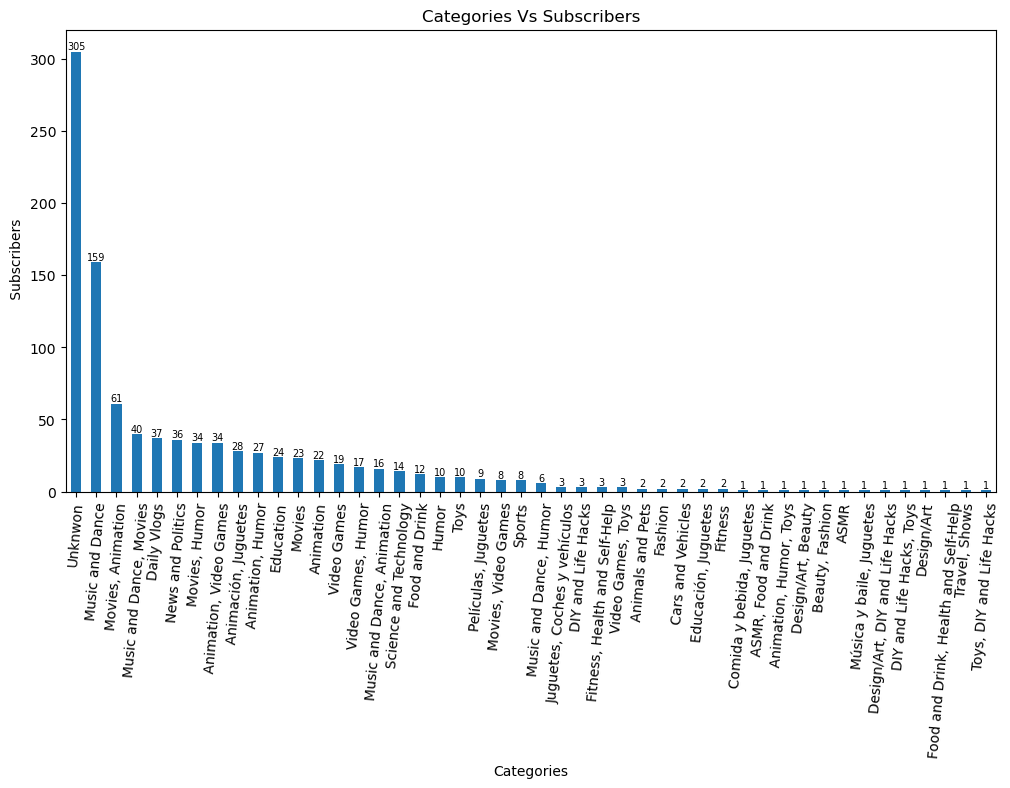

In [25]:
#TREND ANALYSIS
plt.figure(figsize=(12, 6))
data['Categories'].value_counts().plot(kind='bar')
plt.title('Categories Vs Subscribers')
plt.xlabel('Categories')
plt.ylabel(' Subscribers')
plt.xticks(rotation= 85)

for bar in plt.gca().patches:
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
                       ha='center', va='bottom', fontsize= 7)

plt.show()

In [27]:
# ADD Streamers column

data['Streamers'] = data['Likes'] + data['Visits'] + data['Comments'] + data['Subscribers']
data.head()

,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Continent,Streamers
0,tseries,Music and Dance,249500000,India,86200.0,2700,78,Asia,249588978.0
1,MrBeast,"Video Games, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,North America,306218500.0
2,CoComelon,Education,165500000,Unknown,7000000.0,24700,0,Unknwon,172524700.0
3,SETIndia,Unknwon,162600000,India,15600.0,166,9,Asia,162615775.0
4,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,Unknwon,117412400.0


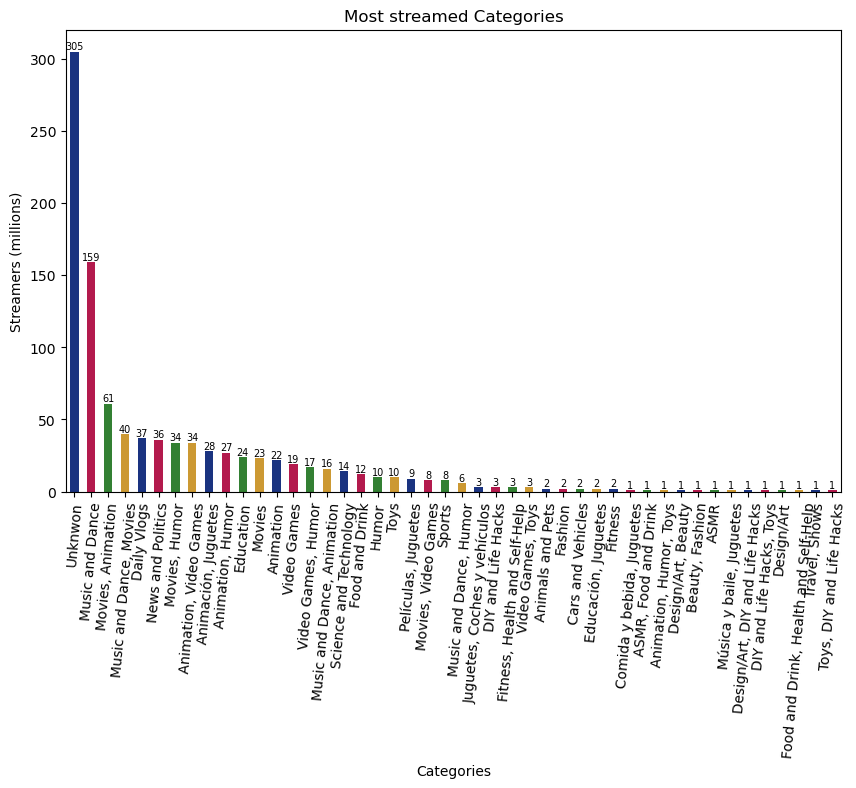

In [29]:
#Most streamed Categories

from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
# Define custom RGB colors for each category
colors = [(0.1, 0.2, 0.5), (0.7, 0.1, 0.3), (0.2, 0.5, 0.2), (0.8, 0.6, 0.2)]

# Plotting the bar chart with custom colors
data['Categories'].value_counts().plot(kind='bar', color=colors)

plt.title('Most streamed Categories')
plt.xlabel('Categories')
plt.ylabel('Streamers (millions)')
plt.xticks(rotation=85)
for bar in plt.gca().patches:
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
                       ha='center', va='bottom', fontsize=7)
plt.show()

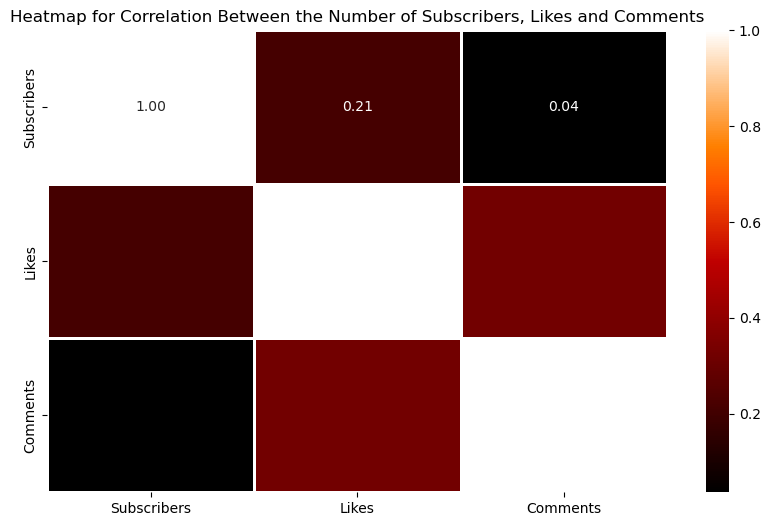

In [33]:
#Heatmap for Correlation Between the Number of Subscribers, Likes and Comments
import pandas as pd
import numpy as np
import seaborn as sns

correlation_data = data[['Subscribers', 'Likes','Comments']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_data, annot=True, cmap='gist_heat', fmt='.2f',linewidths=.8)
plt.title("Heatmap for Correlation Between the Number of Subscribers, Likes and Comments")
plt.show()

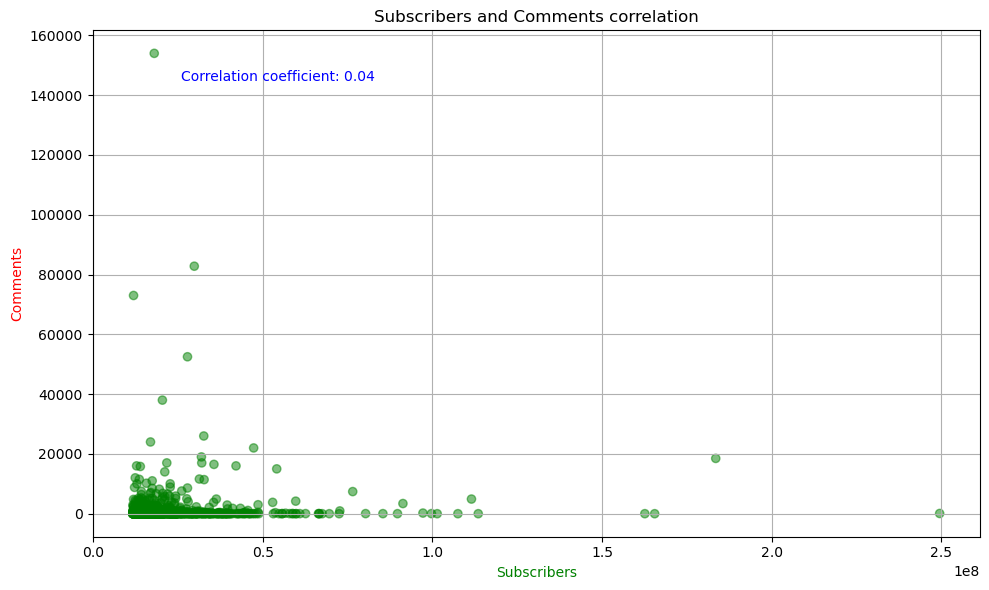

In [35]:
#SUBSCRIBERS VS COMMENTS CORELATION
# Define colors based on the values of x (Subscribers) and y (Comments)
colors = np.where(data['Subscribers'] > data['Comments'], 'green', 'red')

plt.figure(figsize=(10, 6))
plt.scatter(data['Subscribers'], data['Comments'], c=colors, alpha=0.5)
plt.title('Subscribers and Comments correlation', color='black')
plt.xlabel('Subscribers', color='green')
plt.ylabel('Comments', color='red')

# Calculate correlation coefficient
correlation_coefficient = data['Subscribers'].corr(data['Comments'])
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', 
         transform=plt.gca().transAxes, color='blue')

plt.grid(True)
plt.tight_layout()
plt.show()

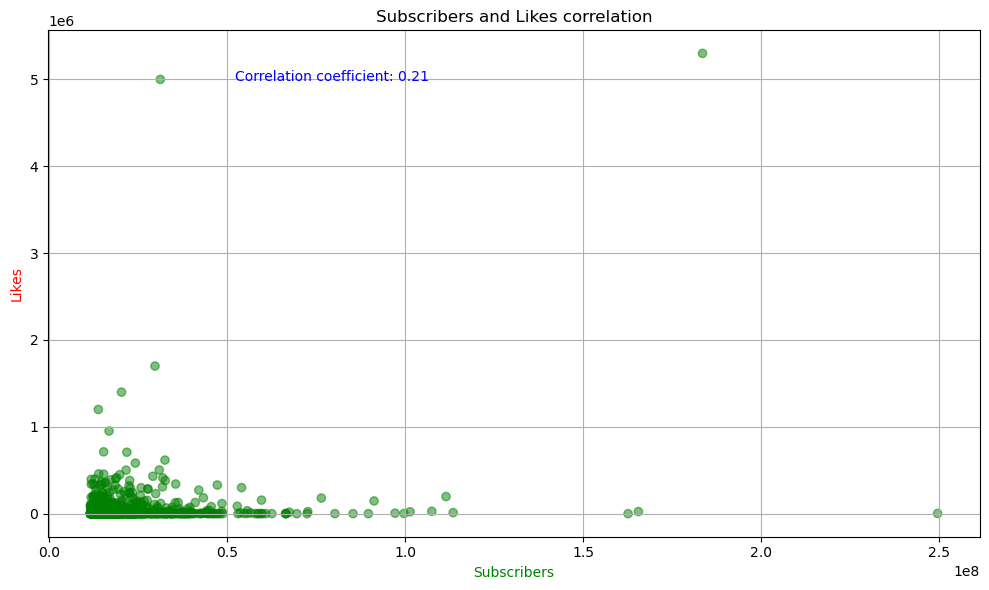

In [37]:
#SUBSCRIBERS VS LIKES CORELATION
colors = np.where(data['Subscribers'] > data['Likes'], 'green', 'red')

plt.figure(figsize=(10, 6))
plt.scatter(data['Subscribers'], data['Likes'], c=colors, alpha=0.5)
plt.title('Subscribers and Likes correlation', color='black')
plt.xlabel('Subscribers', color='green')
plt.ylabel('Likes', color='red')

# Calculate correlation coefficient
correlation_coefficient = data['Subscribers'].corr(data['Likes'])
plt.text(0.2, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', 
         transform=plt.gca().transAxes, color='blue')

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
3.AUDIENCE_STUDY

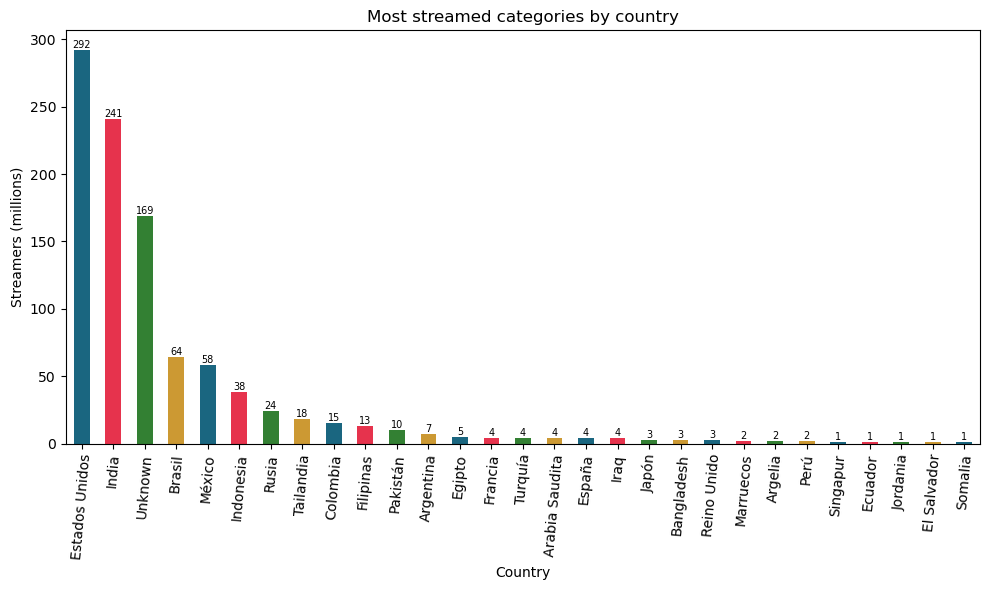

In [39]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
colors = [(0.1, 0.4, 0.5), (0.9, 0.2, 0.3), (0.2, 0.5, 0.2), (0.8, 0.6, 0.2)]
data['Country'].value_counts().plot(kind='bar', color=colors)
plt.title('Most streamed categories by country')
plt.xlabel('Country')
plt.ylabel('Streamers (millions)')
plt.xticks(rotation=85)
plt.tight_layout()

for bar in plt.gca().patches:
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
                       ha='center', va='bottom', fontsize=7)

plt.show()

In [ ]:
4. PERFORMANCE_METRICS

In [41]:
#CALCULATE AVERAGE
average_metrics= data[['Subscribers','Likes','Visits','Comments']].mean()
average_metrics


Subscribers    2.193038e+07
Likes          5.390243e+04
Visits         1.215601e+06
Comments       1.296157e+03
dtype: float64

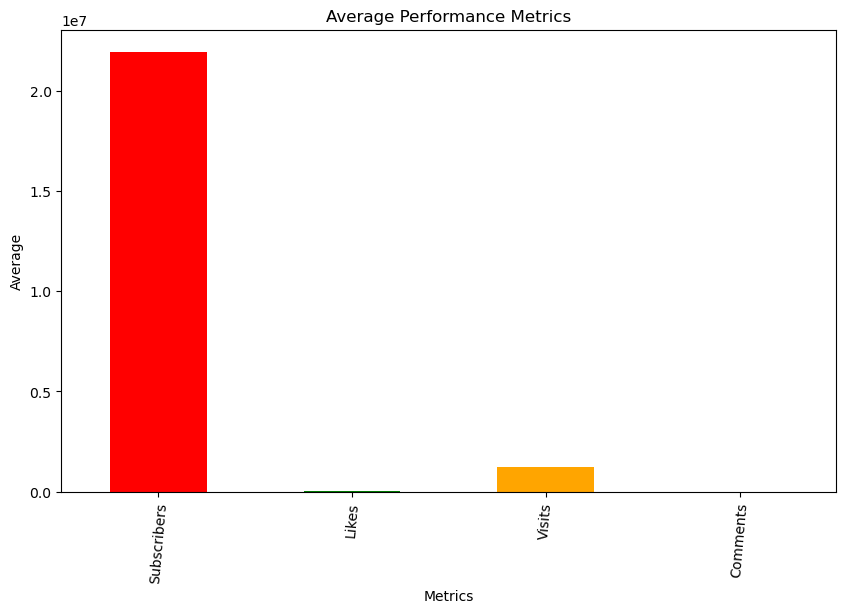

In [42]:
# PLOT THE AVERAGE METRICS
    
plt.figure(figsize=(10, 6))
average_metrics.plot(kind='bar', color=['red', 'green', 'orange', 'skyblue'])
plt.title('Average Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average')
plt.xticks(rotation=85)
plt.show()

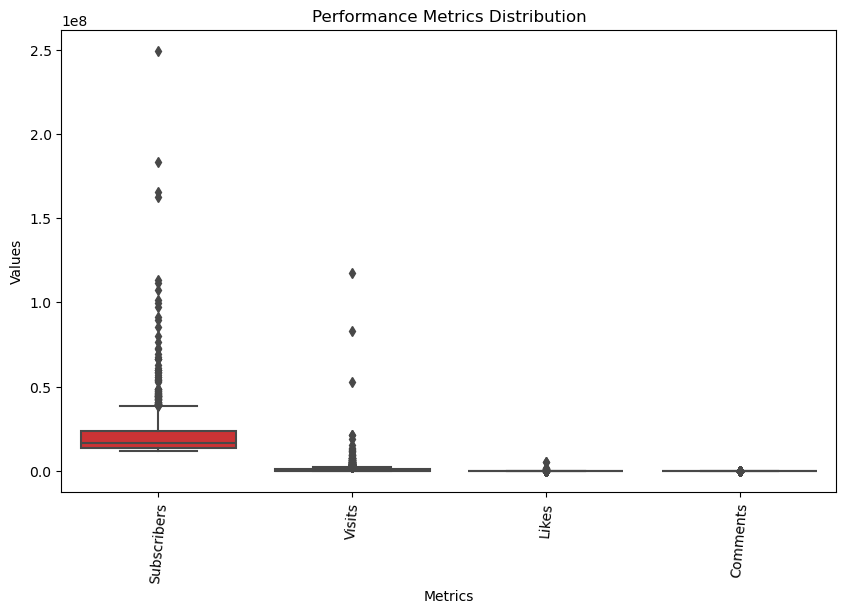

In [44]:
# DISTRIBUTE ANOMALIES AND PATTERNS
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Subscribers', 'Visits', 'Likes', 'Comments']],palette='Set1')
plt.title('Performance Metrics Distribution')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=85)
plt.show()

In [ ]:
5.CONTENT_CATEGORIES

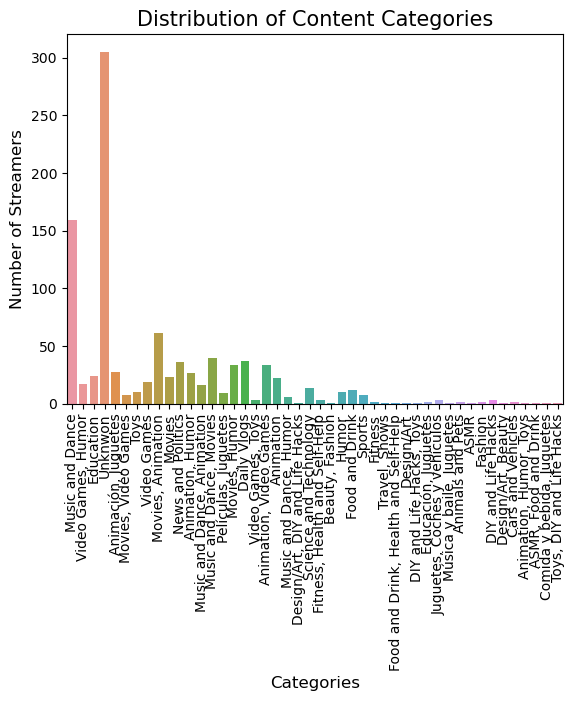

Categories with the highest number of streamers:
- Unknwon: 305


In [50]:
#Content Categories
#plot distribution of content categories which categories have the highest number of streamers

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Categories', data=data)

plt.title('Distribution of Content Categories', fontsize=15)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Streamers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# Get the number of streamers for each category
category_counts = data['Categories'].value_counts()
print('Categories with the highest number of streamers:')
for category, count in category_counts.items():
    if count == category_counts.max():
        print(f'- {category}: {count}')

In [ ]:
7.BENCHMARKING

In [55]:
#Benchmarking

# Calculate the average of subscribers, likes, and comments
average_subscribers = data['Subscribers'].mean()
average_likes = data['Likes'].mean()
average_comments = data['Comments'].mean()

above_average_subscribers = data[data['Subscribers'] > average_subscribers]
above_average_likes = data[data['Likes'] > average_likes]
above_average_comments = data[data['Comments'] > average_comments]
above_average_visits = data[data['Visits'] > data['Visits'].mean()]

print(f"Number of streamers with above-average subscribers: {len(above_average_subscribers)}")
print(f"Number of streamers with above-average likes: {len(above_average_likes)}")
print(f"Number of streamers with above-average comments: {len(above_average_comments)}")
print(f"Number of streamers with above-average visits: {len(above_average_visits)}")

Number of streamers with above-average subscribers: 297
Number of streamers with above-average likes: 179
Number of streamers with above-average comments: 148
Number of streamers with above-average visits: 204
